# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = f"http://api.openweathermap.org/data/2.5/weather?&APPID={weather_api_key}&units=metric"
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()  # YOUR CODE HERE

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]   # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cifuentes
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | kununurra
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | lata
Processing Record 7 of Set 1 | melekeok village
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | beira
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | arteche
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | talara
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | kavieng

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cifuentes,22.6450,-80.0461,31.17,70,75,4.12,CU,1725294579
1,port-aux-francais,-49.3500,70.2167,0.61,59,100,10.92,TF,1725294579
2,kununurra,-15.7667,128.7333,21.99,68,14,0.00,AU,1725294579
3,weno,7.4515,151.8468,27.97,78,100,2.06,FM,1725294580
4,lata,40.1629,-8.3327,24.16,56,100,5.86,PT,1725294580


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cifuentes,22.6450,-80.0461,31.17,70,75,4.12,CU,1725294579
1,port-aux-francais,-49.3500,70.2167,0.61,59,100,10.92,TF,1725294579
2,kununurra,-15.7667,128.7333,21.99,68,14,0.00,AU,1725294579
3,weno,7.4515,151.8468,27.97,78,100,2.06,FM,1725294580
4,lata,40.1629,-8.3327,24.16,56,100,5.86,PT,1725294580


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

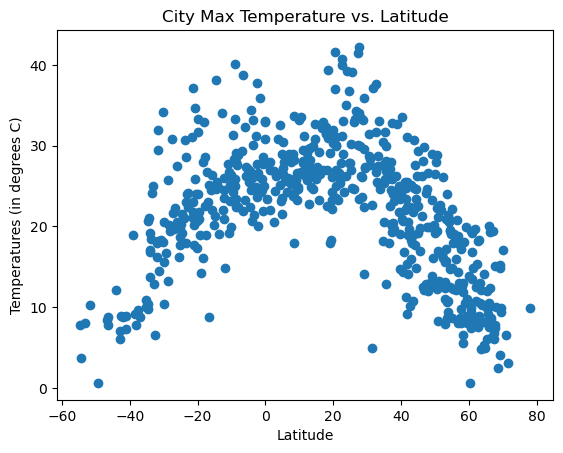

In [12]:
# Build scatter plot for latitude vs. temperature # YOUR CODE HERE
lat = city_data_df["Lat"] 
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Temperatures (in degrees C)")
plt.title("City Max Temperature vs. Latitude")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

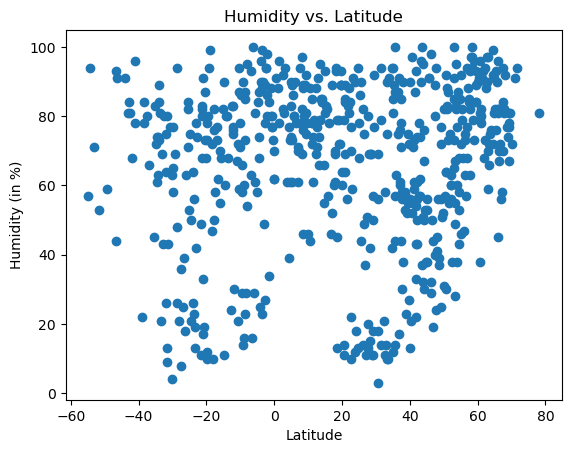

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
humidity = city_data_df["Humidity"]
plt.scatter(lat, humidity)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (in %)")
plt.title("Humidity vs. Latitude")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

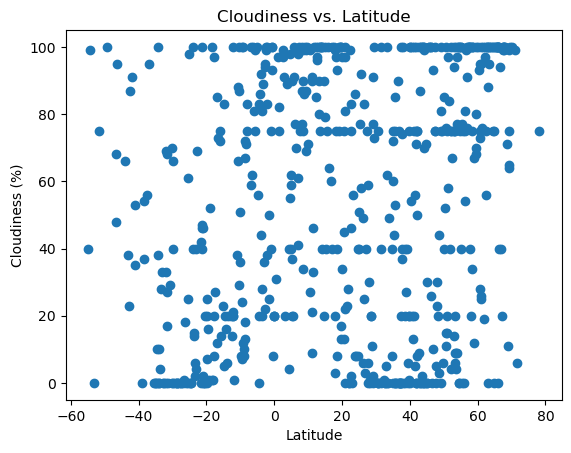

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lat, cloudiness)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

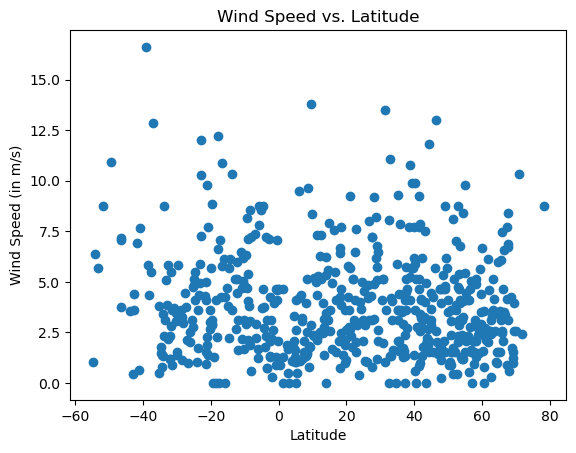

In [31]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]
plt.scatter(lat, wind)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (in m/s)")
plt.title("Wind Speed vs. Latitude")
# Save the figure
plt.savefig("../output_data/Fig4.png")
# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression_plot(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color='red')
    plt.text(0, 10, line_eq, fontsize=12, color='red')
    print(f"The r-value is: {rvalue:.2f}.")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cifuentes,22.6450,-80.0461,31.17,70,75,4.12,CU,1725294579
3,weno,7.4515,151.8468,27.97,78,100,2.06,FM,1725294580
4,lata,40.1629,-8.3327,24.16,56,100,5.86,PT,1725294580
5,melekeok village,7.4957,134.6367,25.31,94,75,1.54,PW,1725294580
7,kodiak,57.7900,-152.4072,9.73,93,100,2.06,US,1725294580


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,0.61,59,100,10.92,TF,1725294579
2,kununurra,-15.7667,128.7333,21.99,68,14,0.00,AU,1725294579
6,invercargill,-46.4000,168.3500,7.79,91,95,7.15,NZ,1725294580
8,blackmans bay,-43.0167,147.3167,6.07,81,38,0.45,AU,1725294554
9,beira,-19.8436,34.8389,24.05,73,20,5.66,MZ,1725294580


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.73.


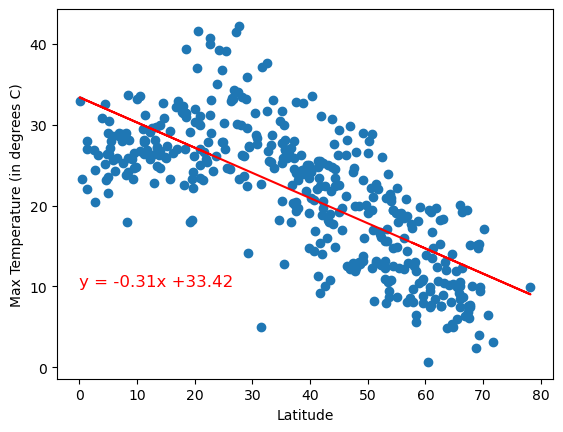

In [21]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (in degrees C)")
plt.show()



The r-value is: 0.71.


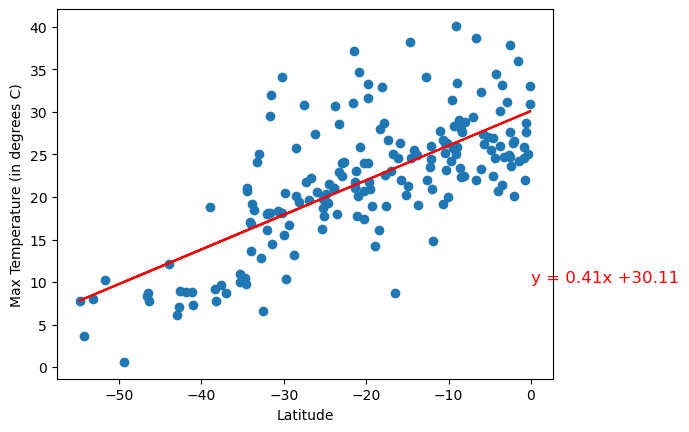

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (in degrees C)")
 
plt.show()


**Discussion about the linear relationship:** There is a strong association between latitude and maximum temperature in cities. As you move toward the equator (Latitude = 0), the maximum temperature per city tends to increase. This pattern is evident both when moving northward from the south pole (from approximately -50 degrees to 0 degrees latitude) and when moving southward from the north pole (from around 80 degrees to 0 degrees latitude), where temperatures rise as you get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06.


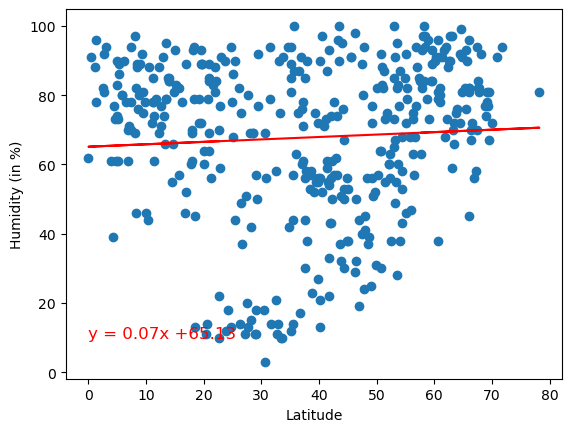

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (in %)")
plt.show()


The r-value is: 0.07.


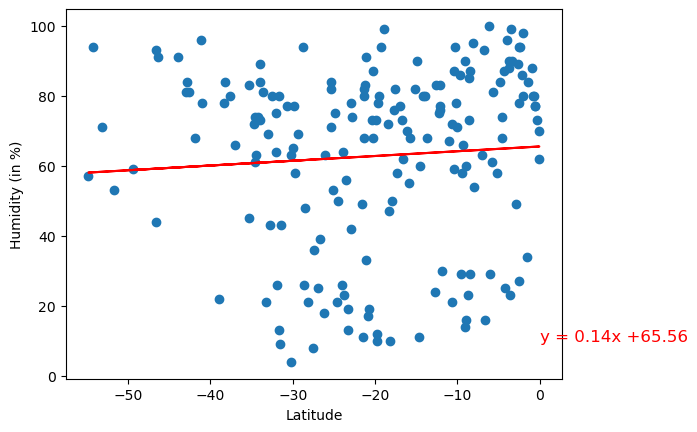

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (in %)")
plt.show()


**Discussion about the linear relationship:** The r-values suggest a weak or nonexistent association between latitude and humidity as you approach the equator (0 degrees) from either pole. The relatively flat linear regression lines indicate that latitude cannot reliably predict humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06.


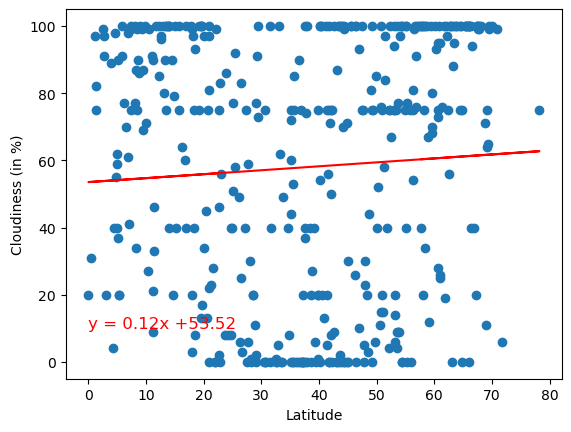

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (in %)")
plt.show()


The r-value is: 0.21.


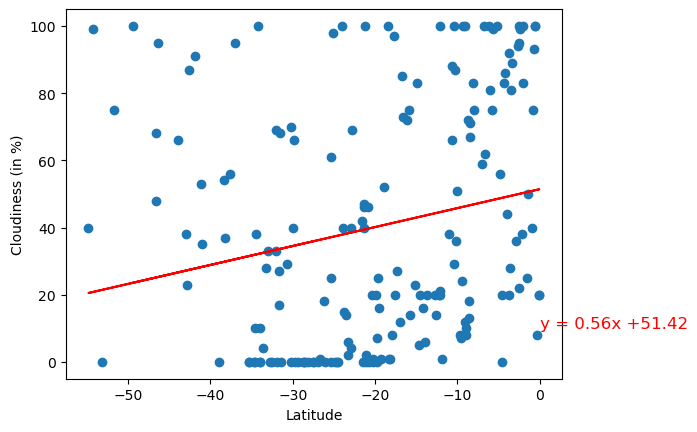

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (in %)")
plt.show()


**Discussion about the linear relationship:** The r-values suggest a weak or nonexistent association between latitude and cloudiness as you approach the equator (0 degrees) from either pole. While the clustering of points at 0% and 100% cloudiness may indicate a relationship between cloudiness and another factor, latitude itself is a poor predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01.


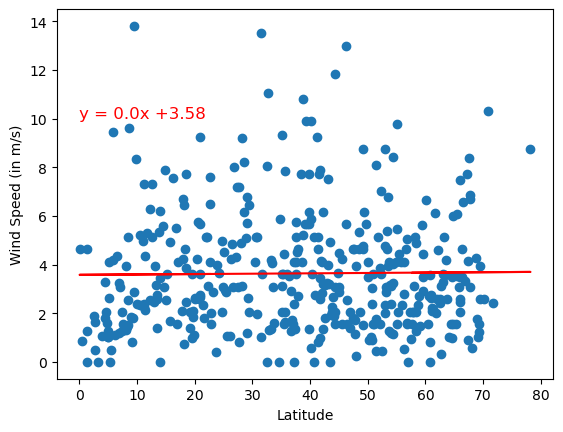

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (in m/s)")
plt.show()


The r-value is: -0.09.


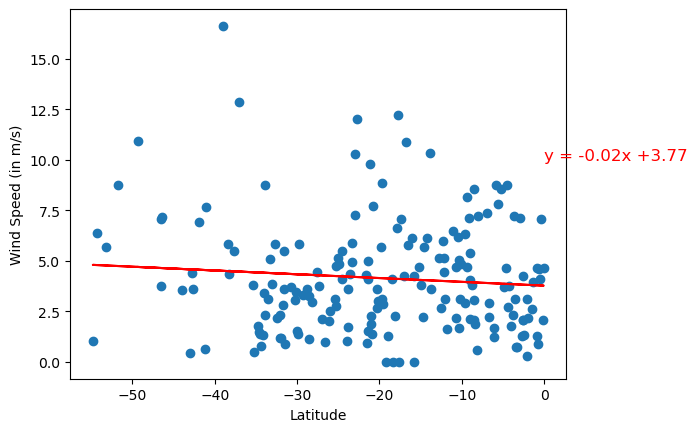

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (in m/s)")
plt.show()


**Discussion about the linear relationship:** The r-values suggest a weak or nonexistent association between latitude and wind speed as you approach the equator (0 degrees) from either pole. Similar to humidity, the relatively flat linear regression lines indicate that latitude cannot reliably predict wind speed.